## Project Goals
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Getting Ready

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load in the data
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [10]:
# What are the unique countries in the dataset?
print(df.Country.unique())
# What is the timeline represented?
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [11]:
# Change the column name to adjust for the common rules
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")

### Exploratory Plots
The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution.

Text(0.5, 0, 'GDP')

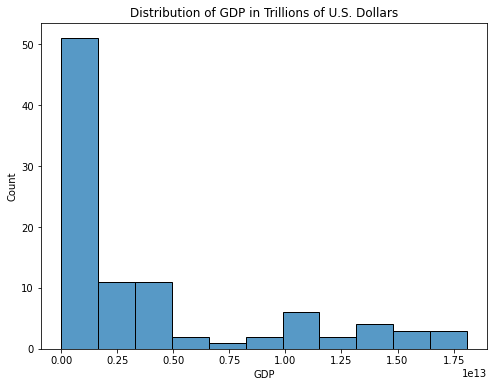

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df.GDP, kde=False)
plt.title("Distribution of GDP in Trillions of U.S. Dollars")
plt.xlabel("GDP")

The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. A further look might also identify different modes or smaller groupings of distributions within the range. 

Text(0.5, 0, 'LEABY (years)')

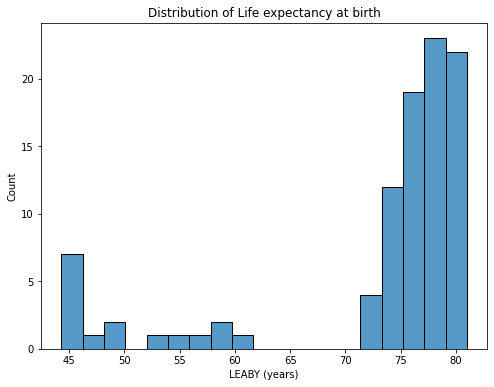

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df.LEABY, kde=False)
plt.title("Distribution of Life expectancy at birth")
plt.xlabel("LEABY (years)")

The previous plots ahow the total numbers of the dataset, so the next task will be to find the average `LEABY` and `GDP` by country.

In [18]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before.

Text(0.5, 0, 'LEABY (years)')

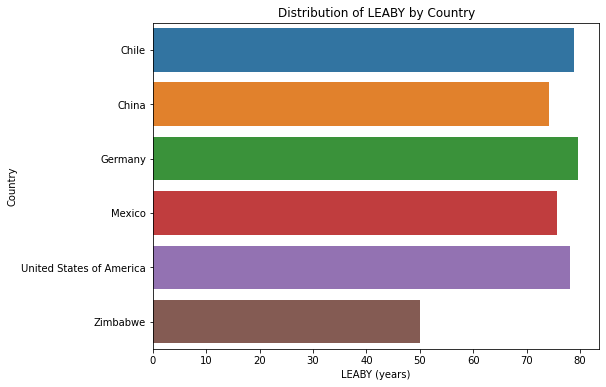

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.title("Distribution of LEABY by Country")
plt.xlabel("LEABY (years)")

For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen.

Text(0.5, 0, 'GDP')

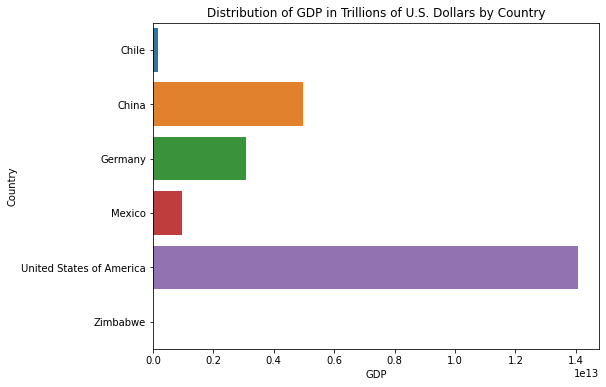

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.title("Distribution of GDP by Country")
plt.xlabel("GDP in Trillions of U.S. Dollars")

### Violin Plots
Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes. The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `LEABY` are on the y axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

Text(0.5, 1.0, 'Distribution of LEABY by Country')

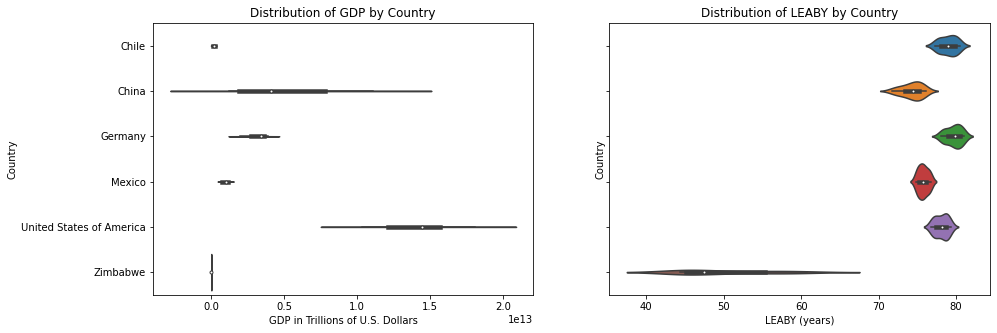

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].set_title("Distribution of GDP by Country")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("LEABY (years)")
axes[1].set_title("Distribution of LEABY by Country")

### Strip Plots
Another newer method for showing distributions is the strip plot, and they can be used to complement the box and violin plots. Strip plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values.

Text(0.5, 1.0, 'Distribution of LEABY by Country')

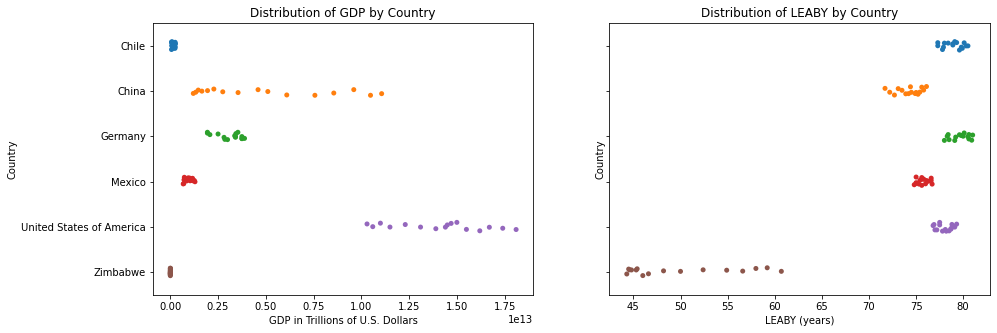

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].set_title("Distribution of GDP by Country")
axes[1] = sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("LEABY (years)")
axes[1].set_title("Distribution of LEABY by Country")

Text(0.5, 1.0, 'Distribution of LEABY by Country')

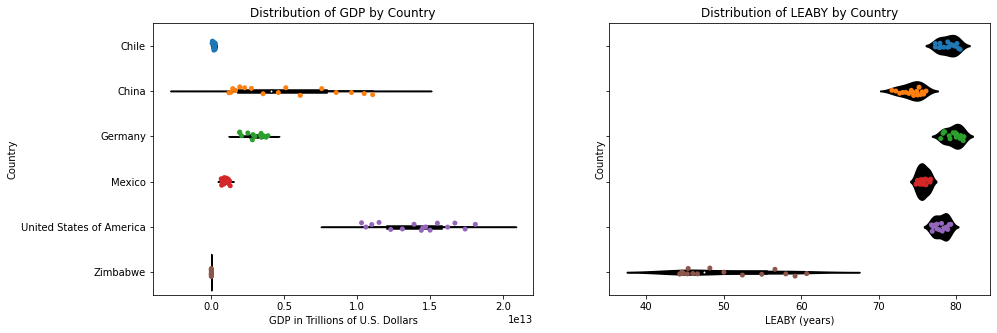

In [31]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].set_title("Distribution of GDP by Country")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("LEABY (years)")
axes[1].set_title("Distribution of LEABY by Country")

### Line Charts

Next the data will explore `GDP` and `LEABY` over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

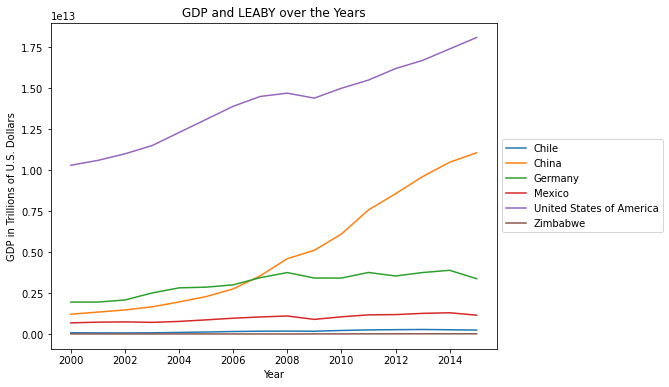

In [32]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("GDP and LEABY over the Years")
plt.ylabel("GDP in Trillions of U.S. Dollars")

Now we want to see the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their `GDP` over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

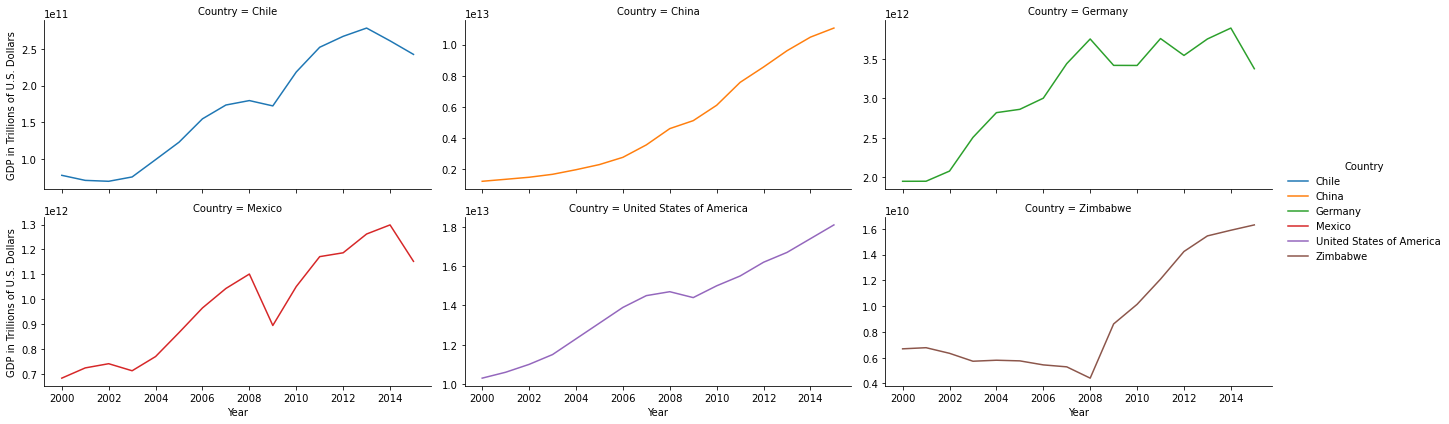

In [60]:
linegraphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, aspect=2)

linegraphGDP = (linegraphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
linegraphGDP

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

Text(0, 0.5, 'LEABY (years)')

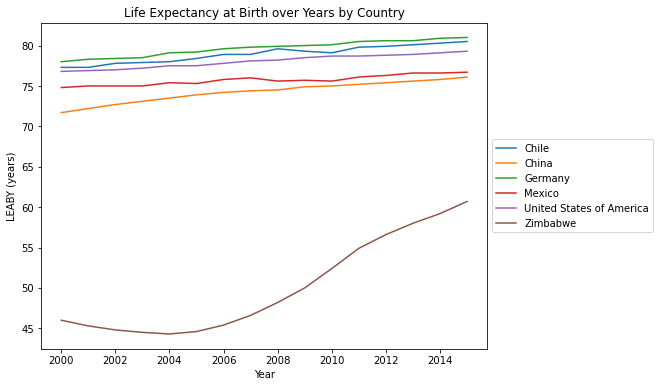

In [61]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Life Expectancy at Birth over Years by Country")
plt.ylabel("LEABY (years)")

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

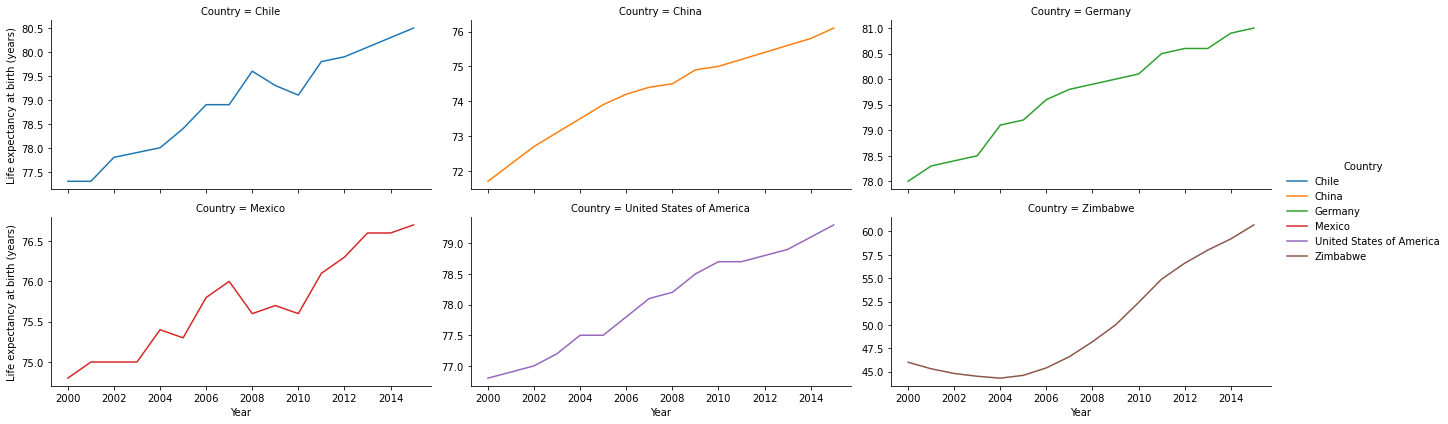

In [62]:
linegraphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, aspect=2)

linegraphLEABY = (linegraphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

linegraphLEABY

### Scatter Plots

The next two charts will explore the relationship between `GDP` and `LEABY`. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

Text(0.5, 1.0, 'Life Expectancy at Birth VS GDP by Country')

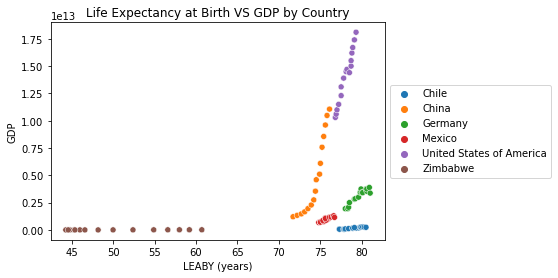

In [64]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("LEABY (years)")
plt.title("Life Expectancy at Birth VS GDP by Country")

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

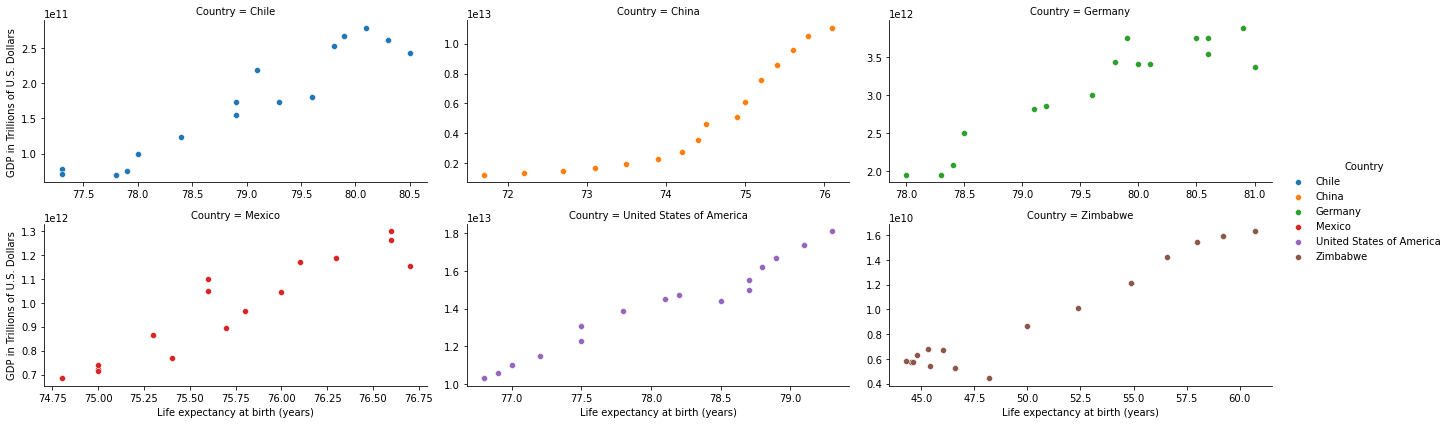

In [66]:
scatter = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False, aspect=2)
scatter = (scatter.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

## Conclusions
We have managed to answer some of the questions posed in the beginning:

1. Has life expectancy increased over time in the six nations?
  - Yes, with Zimbabwe having the greatest increase.
2. Has GDP increased over time in the six nations?
  - GDP has also increased for all countries in the list, especially for China.
3. Is there a correlation between GDP and life expectancy of a country?
  - Yes, there is a positive correlation between GDP and life expectancy for countries in the list.
4. What is the average life expectancy in these nations?
  - Average life expectancy was between mid to high 70s for all countries except for Zimbabwe which was 50.
5. What is the distribution of that life expectancy?
  - Life expectancy had a left skew and most of the observations were on the right side.